# Introduction to Image Processing

If you're new to image processing, it can be overwhelming to know where to start. Image processing is a complex field that involves a wide range of techniques and tools, and it can be challenging to know which ones to focus on first. However, there are a few key concepts that are essential to understanding digital images, and which will provide a solid foundation for further exploration. These include digital images and scikit-image, sampling and quantization, image types, and color spaces. By understanding these basic concepts, you'll be well on your way to gaining a deeper understanding of image processing and its many applications. In this post, we'll provide an introduction to each of these topics, and give you a starting point for further exploration.

### Digital Images and Scikit-Image:

A digital image is a representation of visual information in a digital format, which can be displayed on a computer or other digital device. Scikit-image is a popular Python library that provides tools for image processing and analysis. It offers a wide range of image processing functions, including filtering, segmentation, feature extraction, and more.

Read more in the link for more information about scikit-image.io: https://scikit-image.org/docs/stable/api/skimage.io.html

Digital images are essentially electronic versions of images, which are typically composed of a grid of tiny picture elements called pixels arranged in a two-dimensional matrix. This array can also be represented using an image.

The array representation is:
[[255   0]
 [  0 255]]

The image representation is:


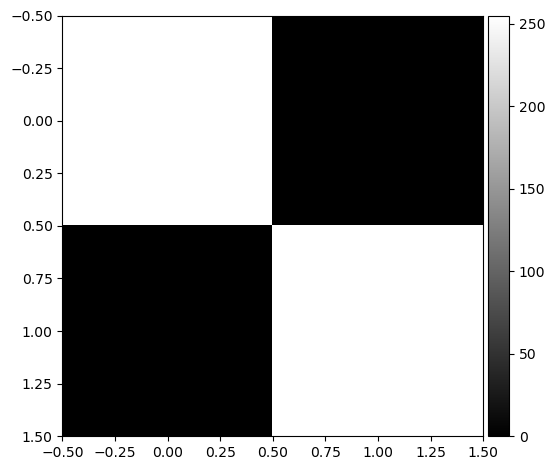

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread

array = np.array([[255, 0], 
                 [0, 255]])
print(f'The array representation is:\n{array}\n')

print('The image representation is:')
imshow(array, cmap='gray');

Now that we know that an image can be represented as a matrix, we can look at a sample image.

The matrix representation of the test image:
[[[100 164 217]
  [100 164 217]
  [100 164 217]
  ...
  [ 87  90 105]
  [ 87  90 105]
  [ 87  90 105]]

 [[100 164 217]
  [100 164 217]
  [100 164 217]
  ...
  [ 87  90 105]
  [ 87  90 105]
  [ 87  90 105]]

 [[100 164 217]
  [100 164 217]
  [100 164 217]
  ...
  [ 87  90 105]
  [ 87  90 105]
  [ 87  90 105]]

 ...

 [[ 59  32  46]
  [ 74  34  47]
  [ 81  36  47]
  ...
  [ 24  19  65]
  [ 17  15  62]
  [ 11  18  76]]

 [[ 65  34  47]
  [ 79  37  48]
  [ 82  37  47]
  ...
  [ 22  19  65]
  [ 20  22  69]
  [ 11  24  86]]

 [[ 69  34  46]
  [ 76  32  43]
  [ 80  35  45]
  ...
  [ 21  22  68]
  [ 14  20  70]
  [  1  19  87]]]



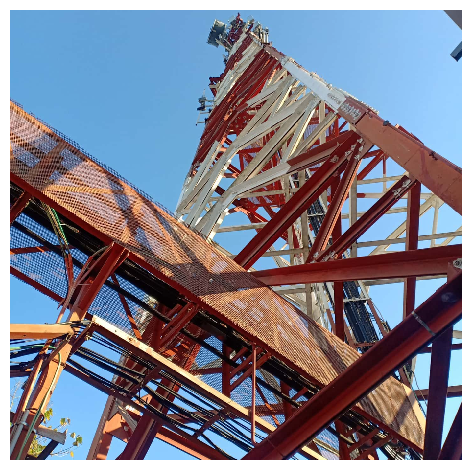

In [4]:
# reading the image
test = imread('cell_site.png')

print(f'The matrix representation of the test image:\n{test}\n')
# turning off the y and x ticks
plt.axis('off') 

# showing the sample image 
imshow(test);

### Sampling and Quantization:

Sampling refers to the process of converting a continuous signal, such as an analog image, into a discrete digital signal. This is done by taking a series of samples of the signal at regular intervals. 

Read more on the scikit-image transform documentation for more details: https://scikit-image.org/docs/stable/api/skimage.transform.html

First let's define a function that generate a 2D array to represent a circle and we'll define N as the number of pixels per side of the image.

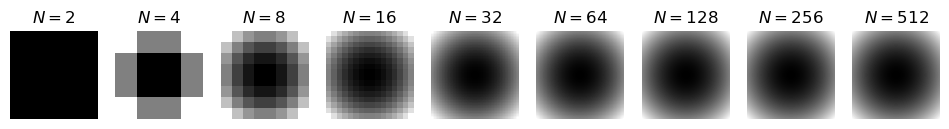

In [5]:
def circle_image(x, y):
    """
    Generate a 2D array representing a circle
    with the given x and y coordinates.

    Parameters
    ----------
    x : array-like
        1D array of x coordinates.
    y : array-like
        1D array of y coordinates.

    Returns
    -------
    Z : ndarray
        2D array representing a circle with the
        same shape as X and Y.
    """
    X, Y = np.meshgrid(x, y)
    Z = X**2 + Y**2
    return Z

Ns = 2**np.arange(1, 10)

fig, ax = plt.subplots(1, len(Ns), figsize=(12, 4))

for i, N in enumerate(Ns):
    image = circle_image(np.linspace(-1, 1, num=N), np.linspace(-1, 1, num=N))
    ax[i].axis('off')
    ax[i].imshow(image, cmap='gray')
    ax[i].set_title(r'$N = %d$' % N)

We can observe that as the value for N increases, the denser the points are and the better the resolution is. Now let's try downsampling our sample digital photo.

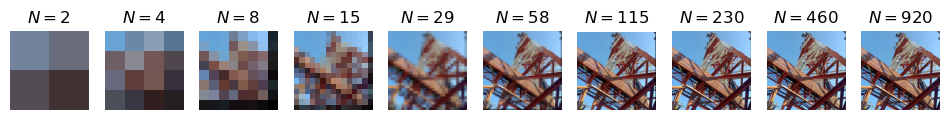

In [6]:
from skimage.io import imread
from skimage.transform import downscale_local_mean

factors = 2**np.arange(0, 10)
fig, ax = plt.subplots(1, len(factors), figsize=(12, 4))
for i,factor in enumerate(factors):
    image = downscale_local_mean(test, 
                                 factors=(factor, factor, 1)).astype(int)
    ax_num = len(factors) - i - 1
    ax[ax_num].axis('off')
    ax[ax_num].imshow(image)
    ax[ax_num].set_title(r'$N=%d$' % image.shape[0])

See that the N=2 is not even recognizable and around N=15 the image is blurred and as we increase to N=920, the image is now clear.

Quantization, on the other hand, is the process of reducing the number of bits used to represent each sample. This is done to reduce the size of the digital file, while still preserving the visual quality of the image. Below, we define the number of bits k to reresent an intensity value as its bit depth.

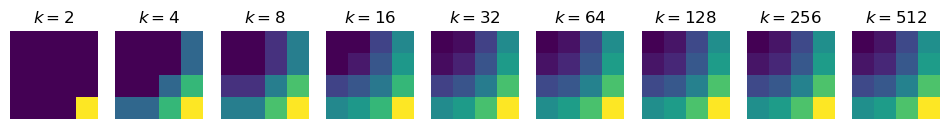

In [7]:
ks = 2**np.arange(1, 10)
circ_image = circle_image(np.linspace(0, 1, num=4), 
                          np.linspace(0, 1, num=4))
fig, ax = plt.subplots(1, len(ks), figsize=(12, 4))
for i, k in enumerate(ks):
    bins = np.linspace(0, circ_image.max(), k)
    image = np.digitize(circ_image, bins)
    image = np.vectorize(bins.tolist().__getitem__)(image-1)
    ax[i].axis('off')
    ax[i].imshow(image)
    ax[i].set_title(r'$k = %d$' % k)

We can observe that as the value for k increases, the intensity value or bit depth also increases. Let's now try it on our sample image.

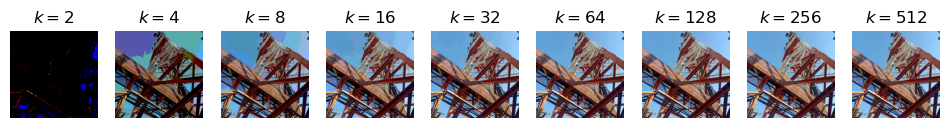

In [8]:
ks = 2**np.arange(1, 10)
fig, ax = plt.subplots(1, len(ks), figsize=(12, 4))
for i, k in enumerate(ks):
    bins = np.linspace(0, test.max(), k)
    image = np.digitize(test, bins)
    image = np.vectorize(bins.tolist().__getitem__)(image-1).astype(int)
    ax[i].axis('off')
    ax[i].imshow(image)
    ax[i].set_title(r'$k = %d$' % k)

We can see that as the value for k, like the circle representation previously, the intensity and bit depth increases. The bit depth of an image affects the amount of detail and nuance that can be represented in the image. A higher bit depth generally allows for more subtle differences in intensity or color to be captured, resulting in a more realistic or detailed image.

### Image Types:

The three main types of digital images are binary, grayscale, and colormap. Binary images consist of only two colors (usually black and white), and are commonly used for tasks such as edge detection and object recognition. Grayscale images consist of shades of gray, with each pixel representing a single value that corresponds to the brightness of the pixel. Grayscale images are often used for tasks such as contrast enhancement and noise reduction. Colormap images use a lookup table to map each pixel value to a specific color, and are commonly used in scientific and medical imaging, as well as for data visualization.

Read more on the scikit-image color documentation for more detail: https://scikit-image.org/docs/stable/api/skimage.color.html

Let's play around with our sample image where we convert it to grayscale. Traditionally, we compute for its luminance or intensity values but luckily, skimage already has the package for it called rgb2gray.

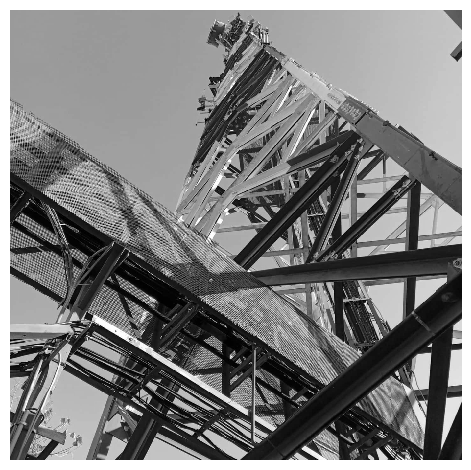

In [9]:
from skimage.color import rgb2gray, gray2rgb

test_gray = rgb2gray(test)
plt.axis('off')
imshow(test_gray);

We can also convert the gray image to monochrome or binary image where we apply thresholding. By this all those that are below the minimumm allowed value will be converted to 0 and those that are above it will be converted to 1 or 255. In this example we use the mean pixel value as the threshold.

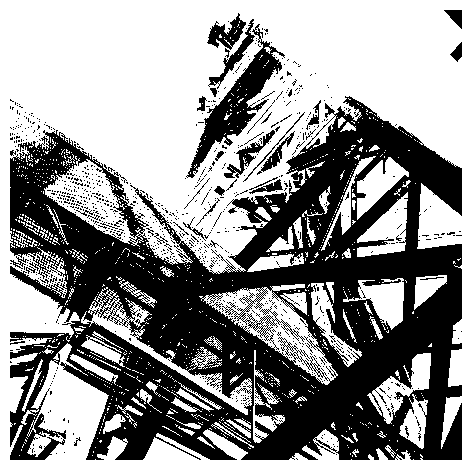

In [10]:
from skimage import img_as_uint

test_binary = img_as_uint(test_gray > test_gray.mean())
plt.axis('off')
imshow(test_binary);

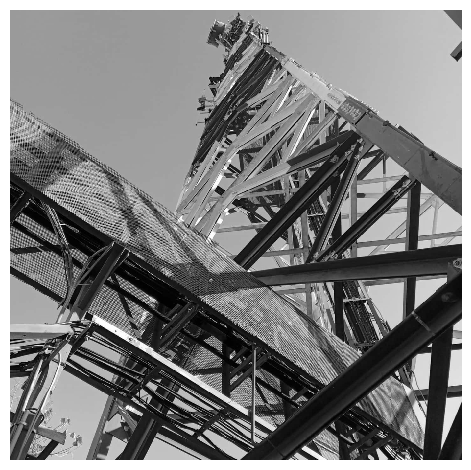

In [11]:
from skimage.color import gray2rgb

test_color = gray2rgb(test_gray)
plt.axis('off')
imshow(test_color);

Now you may say "the image is still gray!" but if we check the shapes of both test_gray and test_color, we will see that the '3' is introduced back to the test_color. Check the shapes below.

In [12]:
print(f'rgb2gray resulting shape: {test_gray.shape}')
print(f'gray2rgb resulting shape: {test_color.shape}')

rgb2gray resulting shape: (920, 923)
gray2rgb resulting shape: (920, 923, 3)


### Color Spaces:

A color space is a specific way of representing colors in digital images. The most commonly used color space is RGB (Red, Green, Blue), which is used for displaying colors on screens. Another common color space is CMYK (Cyan, Magenta, Yellow, Black), which is used for printing. Other color spaces include HSL (Hue, Saturation, Lightness), HSV (Hue, Saturation, Value), and Lab (Luminance, a and b). Each color space has its own advantages and disadvantages, depending on the intended use of the image.

We know that by defaul, RGB space is used to represent a color image, where the last coordinate selects a particular color channel. Let's check it out on our sample image.

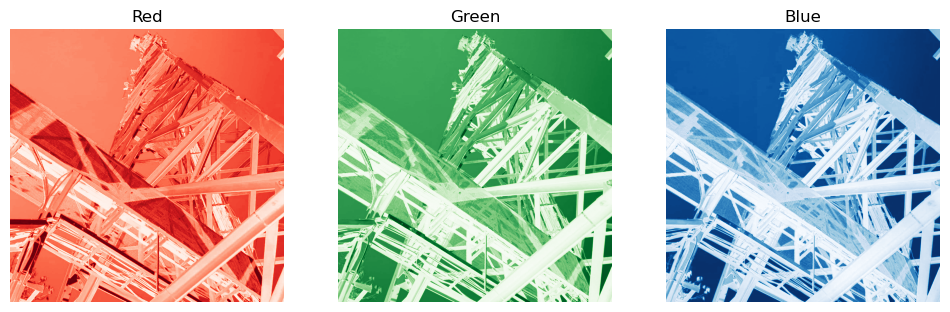

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))
ax[0].imshow(test[:,:,0], cmap='Reds')
ax[0].axis('off')
ax[0].set_title('Red')
ax[1].imshow(test[:,:,1], cmap='Greens')
ax[1].axis('off')
ax[1].set_title('Green')
ax[2].imshow(test[:,:,2], cmap='Blues')
ax[2].axis('off')
ax[2].set_title('Blue');

We can also convert the RGB space representation to HSV by using rgb2hsv from scikit-image. Read more on this from: https://scikit-image.org/docs/stable/api/skimage.color.html

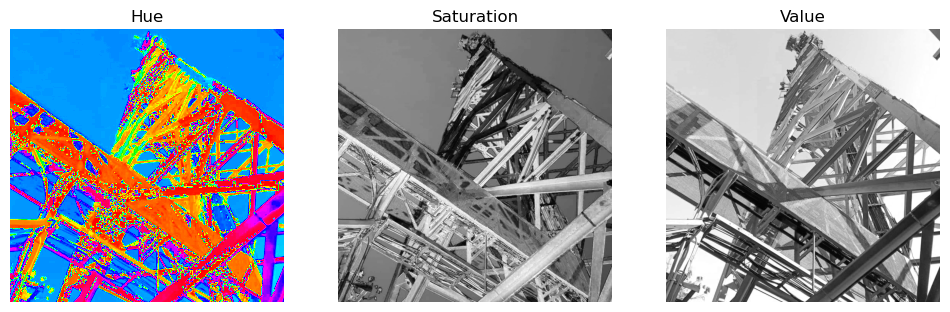

In [14]:
from skimage.color import rgb2hsv

test_hsv = rgb2hsv(test)

fig, ax = plt.subplots(1, 3, figsize=(12,4))
ax[0].imshow(test_hsv[:,:,0], cmap='hsv')
ax[0].axis('off')
ax[0].set_title('Hue')
ax[1].imshow(test_hsv[:,:,1], cmap='gray')
ax[1].axis('off')
ax[1].set_title('Saturation')
ax[2].imshow(test_hsv[:,:,2], cmap='gray')
ax[2].axis('off')
ax[2].set_title('Value');

From this, we can convert an image from HSV back to RGB by using hsv2rgb.

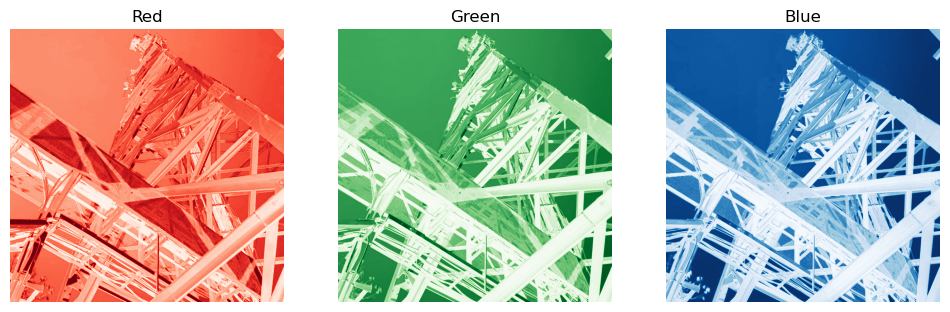

In [15]:
from skimage.color import hsv2rgb

test_rgb = hsv2rgb(test_hsv)

testfig, ax = plt.subplots(1, 3, figsize=(12,4))
ax[0].imshow(test_rgb[:,:,0], cmap='Reds')
ax[0].axis('off')
ax[0].set_title('Red')
ax[1].imshow(test_rgb[:,:,1], cmap='Greens')
ax[1].axis('off')
ax[1].set_title('Green')
ax[2].imshow(test_rgb[:,:,2], cmap='Blues')
ax[2].axis('off')
ax[2].set_title('Blue');

I hope this introduction to digital images has been helpful in providing a basic understanding of some of the key concepts in image processing. While there is much more to explore in this field, the topics of digital images and scikit-image, sampling and quantization, image types, and color spaces provide a solid foundation for further exploration. Whether you're interested in pursuing image processing as a career, or simply want to gain a better understanding of how digital images work, these concepts are essential to know. With continued learning and practice, you can become proficient in the many tools and techniques available for image processing, and apply this knowledge to a wide range of real-world applications.